# DATA ANALYSIS OF LA LIGA
The data used for this initial data analysis contains the information of matches ranging from season 1928/1929 to 2021/2022.

The different studies will be separated by title and brief description and the code for that specific problem.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os


In [51]:
db_path = os.path.join(os.getcwd(), 'laliga.sqlite')
laliga_con = sqlite3.connect(str(db_path))
cursor = laliga_con.cursor()

### 1.  Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there’s a tie) of all matches in the data. Write in the plot the percentage of each category.

In [52]:
cursor.execute('SELECT * FROM Matches')
data = cursor.fetchall()

columns = cursor.execute('PRAGMA table_info(Matches)').fetchall()
columns = [col[1] for col in columns]

df = pd.DataFrame(data, columns=columns)
df = df[df['score'].notna()]

In [53]:
df[['goals_home', 'goals_away']] = df['score'].str.split(':', expand=True).astype(int)

In [54]:
results = [
    (df['goals_home'] > df['goals_away']),
    (df['goals_home'] == df['goals_away']),
    (df['goals_home'] < df['goals_away'])
]

df['result'] = np.select(results, ['1', 'X', '2'])

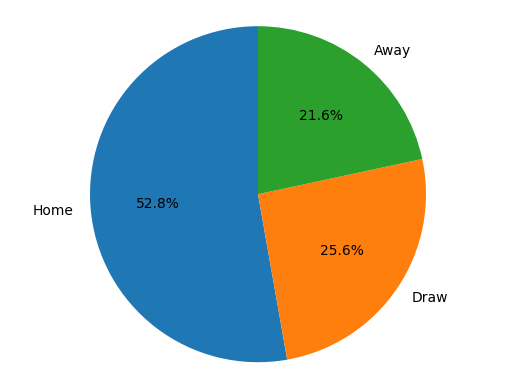

In [60]:
wins = df['result'].value_counts()

labels = ['Home', 'Draw', 'Away']
sizes = [wins['1'], wins['X'], wins['2']]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

### 2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division. What have been the biggest wins? Of course, when we say biggest we mean those with the highest goal difference. Show the top ten of them in a table.


In [64]:
df_1div = df[df['division'] == 1]

,season,division,matchday,date,time,home_team,away_team,score,goals_home,goals_away,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,X
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48203,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,0,1,2
48204,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,2,1,1
48205,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,2,3,2
48206,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,4,0,1
